## 7.1.1

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
def generate_data(sigma, num_samples=10000, bins=100, bin_range=(-4, 4)):
    mu_values = np.linspace(-1, 1, num=21)
    histograms = []
    
    for mu in mu_values:
        samples = np.random.normal(loc=mu, scale=sigma, size=num_samples)
        hist, bin_edges = np.histogram(samples, bins=np.linspace(bin_range[0], bin_range[1], bins+1), density=True)
        histograms.append(hist)
    
    return np.array(histograms), mu_values

sigma_values = [0.8, 0.4, 0.2, 0.1]
all_histograms = {}

for sigma in sigma_values:
    all_histograms[sigma], _ = generate_data(sigma)

# Displaying histogram Shapes
for sigma, hist in all_histograms.items():
    print(f"Histograms for σ={sigma} have a shape: {hist.shape}")


Histograms for σ=0.8 have a shape: (21, 100)
Histograms for σ=0.4 have a shape: (21, 100)
Histograms for σ=0.2 have a shape: (21, 100)
Histograms for σ=0.1 have a shape: (21, 100)


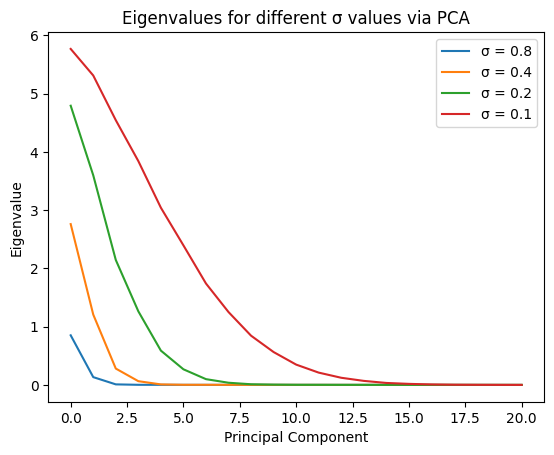

In [6]:
def apply_pca(all_histograms):
    pca = PCA().fit(all_histograms)
    
    return pca

pca_dict = {}
for sigma, hist in all_histograms.items():
    pca_dict[sigma] = apply_pca(hist)

eigenvalues_dict = {}

for sigma, pca in pca_dict.items():
    eigenvalues_dict[sigma] = pca.explained_variance_
    
# Plotting
plt.figure()
for sigma in sigma_values:
    plt.plot(eigenvalues_dict[sigma], label=f'σ = {sigma}')
plt.title('Eigenvalues for different σ values via PCA')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.show()


## 7.1.2

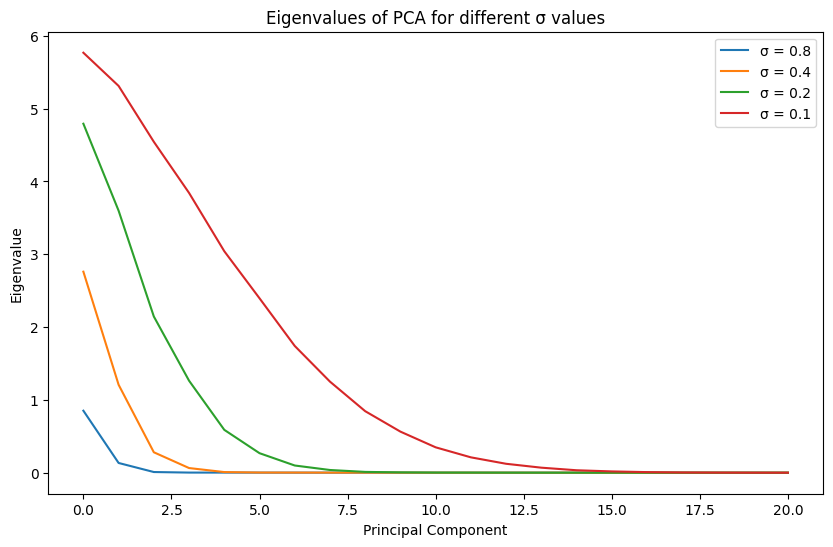

Sigma: 0.8
Eigenvalues: [0.85176148 0.13387287 0.00948529 0.00195251 0.00164801]
Explained variance ratio: [0.84543789 0.13287898 0.00941487 0.00193801 0.00163578]
------------------------------
Sigma: 0.4
Eigenvalues: [2.76100133 1.20809466 0.28083586 0.06415616 0.00883763]
Explained variance ratio: [0.6368577  0.27866136 0.06477812 0.01479838 0.0020385 ]
------------------------------
Sigma: 0.2
Eigenvalues: [4.7931185  3.59858244 2.14547919 1.26369894 0.58891478]
Explained variance ratio: [0.37393572 0.28074384 0.16737982 0.09858763 0.04594426]
------------------------------
Sigma: 0.1
Eigenvalues: [5.76830194 5.31222534 4.54494419 3.84261502 3.04208562]
Explained variance ratio: [0.19148005 0.17634049 0.15087042 0.12755645 0.1009827 ]
------------------------------


In [7]:
pca_results = {}
eigenvalues = {}

for sigma, all_histograms in all_histograms.items():
    pca = PCA()
    pca.fit(all_histograms)
    pca_results[sigma] = pca
    eigenvalues[sigma] = pca.explained_variance_

plt.figure(figsize=(10, 6))

for sigma in sigma_values:
    plt.plot(eigenvalues[sigma], label=f'σ = {sigma}')

plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of PCA for different σ values')
plt.legend()
plt.show()

for sigma in sigma_values:
    print(f'Sigma: {sigma}')
    print(f'Eigenvalues: {eigenvalues[sigma][:5]}')
    print(f'Explained variance ratio: {pca_results[sigma].explained_variance_ratio_[:5]}')
    print('-' * 30)


## 7.1.3

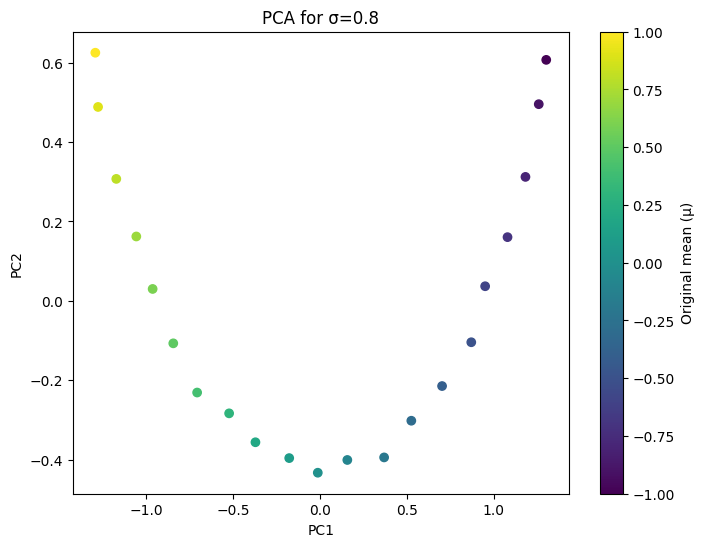

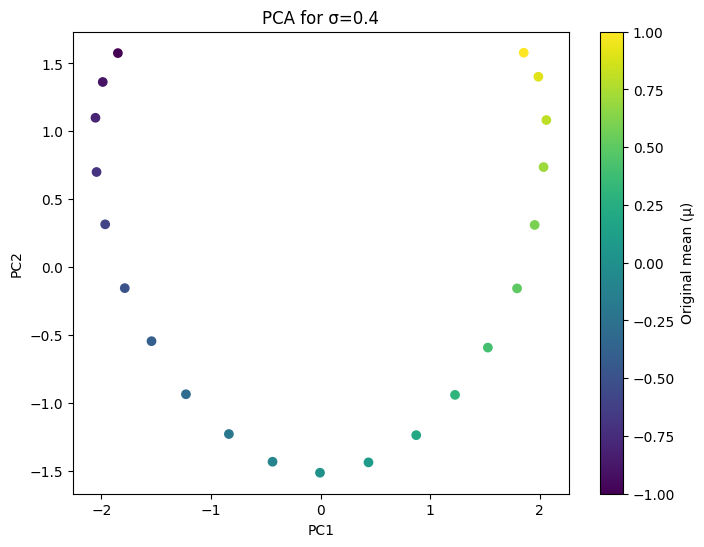

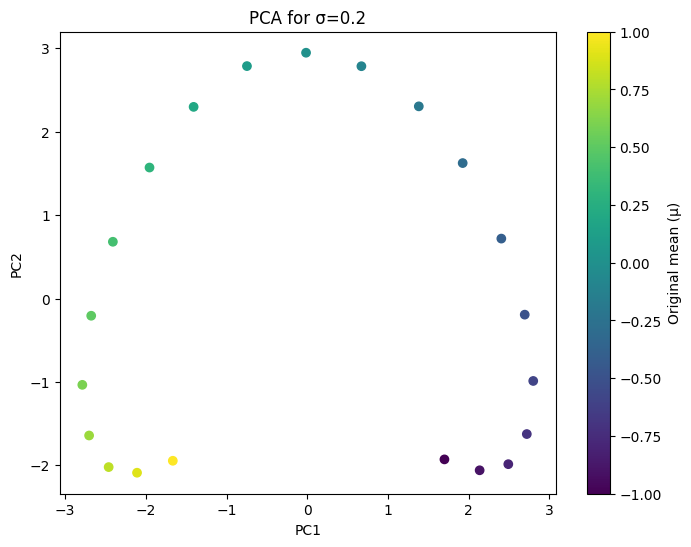

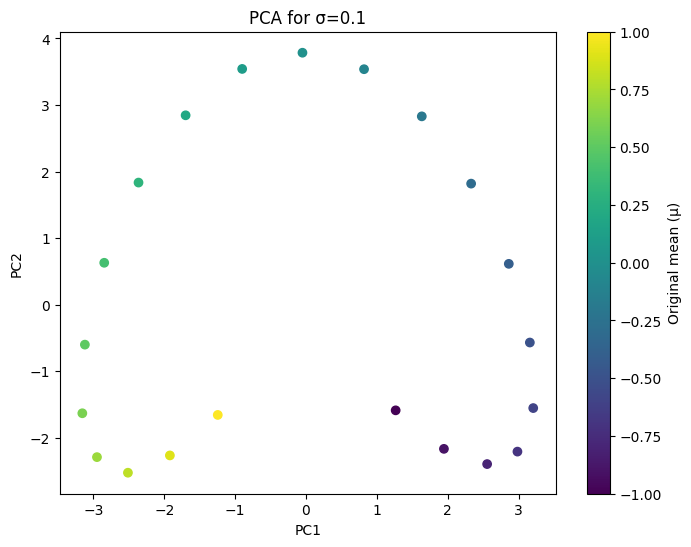

In [8]:
for sigma in sigma_values:
    histograms, mu_values = generate_data(sigma)
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(histograms)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=mu_values, cmap='viridis')
    plt.colorbar(scatter, label='Original mean (µ)')
    plt.title(f'PCA for σ={sigma}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()


## 7.2.4

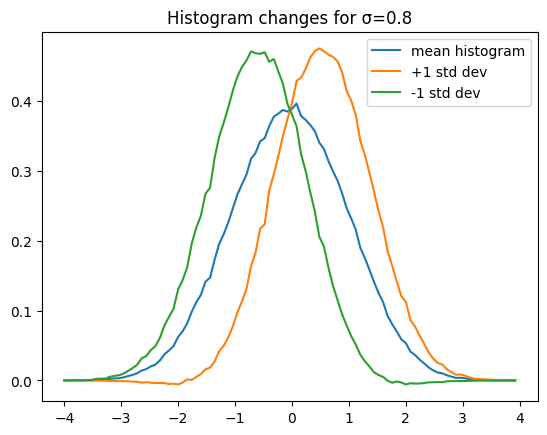

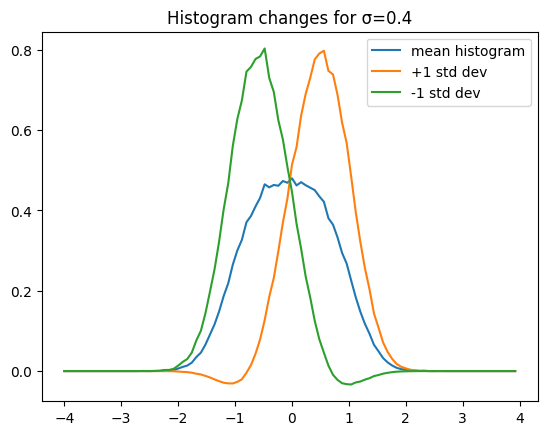

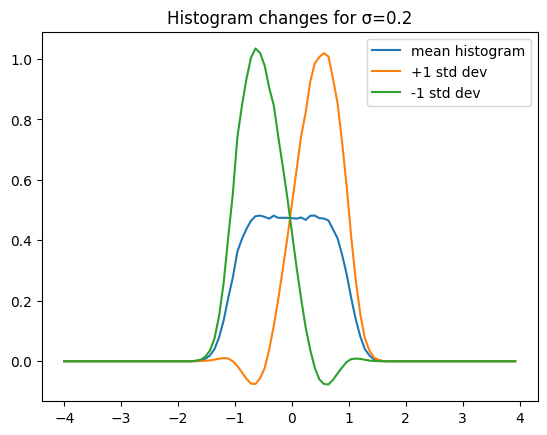

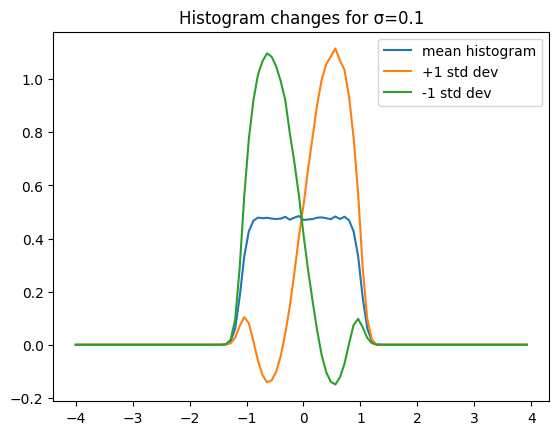

In [9]:
for sigma in sigma_values:
    histograms, _ = generate_data(sigma)
    pca = PCA(n_components=2)
    pca.fit(histograms)
    pc1 = pca.components_[0]
    std_dev = np.std(pca.transform(histograms)[:,0])
    mean_histogram = histograms.mean(axis=0)
    histograms_plus = mean_histogram + std_dev * pc1
    histograms_minus = mean_histogram - std_dev * pc1
    bin_edges = np.linspace(-4, 4, 101)
    
    plt.plot(bin_edges[:-1], mean_histogram, label='mean histogram')
    plt.plot(bin_edges[:-1], histograms_plus, label='+1 std dev')
    plt.plot(bin_edges[:-1], histograms_minus, label='-1 std dev')
    plt.title(f'Histogram changes for σ={sigma}')
    plt.legend()
    plt.show()


## Exercise 7.2

In [2]:
import numpy as np
from scipy.sparse import coo_matrix
from scipy.sparse.csgraph import shortest_path
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

## 7.2.1

In [3]:
# Load the graph data
graph1_data = np.load('graph1.npz')
graph2_data = np.load('graph2.npz')

# Number of vertices
vertices_n = 512  

# Create sparse matrices for both graphs
graph1 = coo_matrix((graph1_data['data'], (graph1_data['i'], graph1_data['j'])), shape=(vertices_n, vertices_n))
graph2 = coo_matrix((graph2_data['data'], (graph2_data['i'], graph2_data['j'])), shape=(vertices_n, vertices_n))

# Compute matrix of squared pairwise distances for both graphs
shortest_path_matrix1 = shortest_path(csgraph=graph1) ** 2
shortest_path_matrix2 = shortest_path(csgraph=graph2) ** 2

print("Shape of the shortest path matrix for graph1: ", shortest_path_matrix1.shape)
print("Shape of the shortest path matrix for graph2: ", shortest_path_matrix2.shape)


Shape of the shortest path matrix for graph1:  (512, 512)
Shape of the shortest path matrix for graph2:  (512, 512)


## 7.2.2

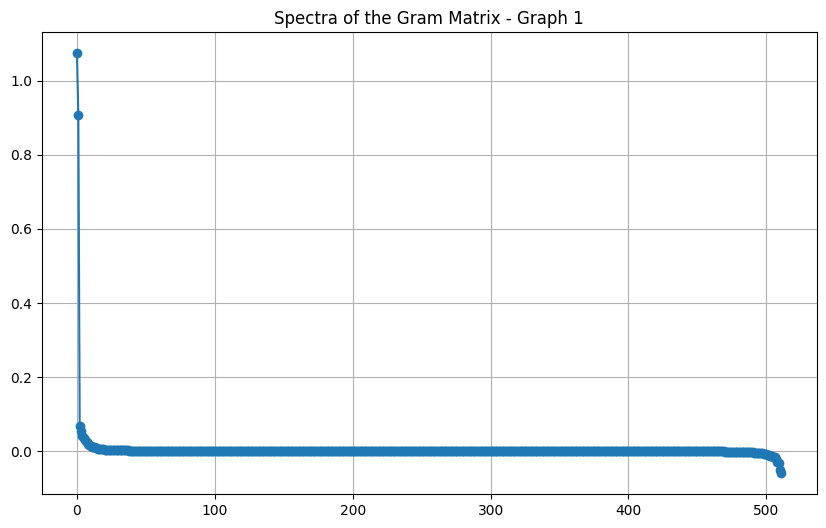

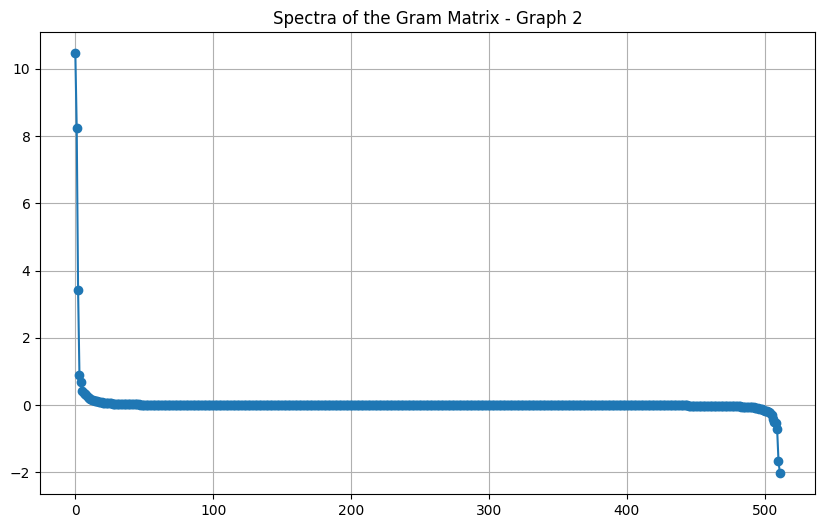

In [4]:
# Double centering
def double_cent(D_squared):
    n = D_squared.shape[0]
    center_matrix = np.eye(n) - np.ones((n, n)) / n
    return -0.5 * center_matrix @ D_squared @ center_matrix

# Run MDS and plot spectrum
def execute_mds_and_plot(dist_matrix, graph):
    n = dist_matrix.shape[0]
    B = double_cent(dist_matrix)
    eigvals, eigvecs = np.linalg.eigh(B)
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.flip(np.sort(eigvals)), marker='o')
    plt.title('Spectra of the Gram Matrix - {}'.format(graph))
    plt.grid(True)
    plt.show()
    return eigvals, eigvecs

# Execute MDS on both graphs and plot their spectra
eigvals1, eigvecs1 = execute_mds_and_plot(shortest_path_matrix1, "Graph 1")
eigvals2, eigvecs2 = execute_mds_and_plot(shortest_path_matrix2, "Graph 2")


## 7.2.3

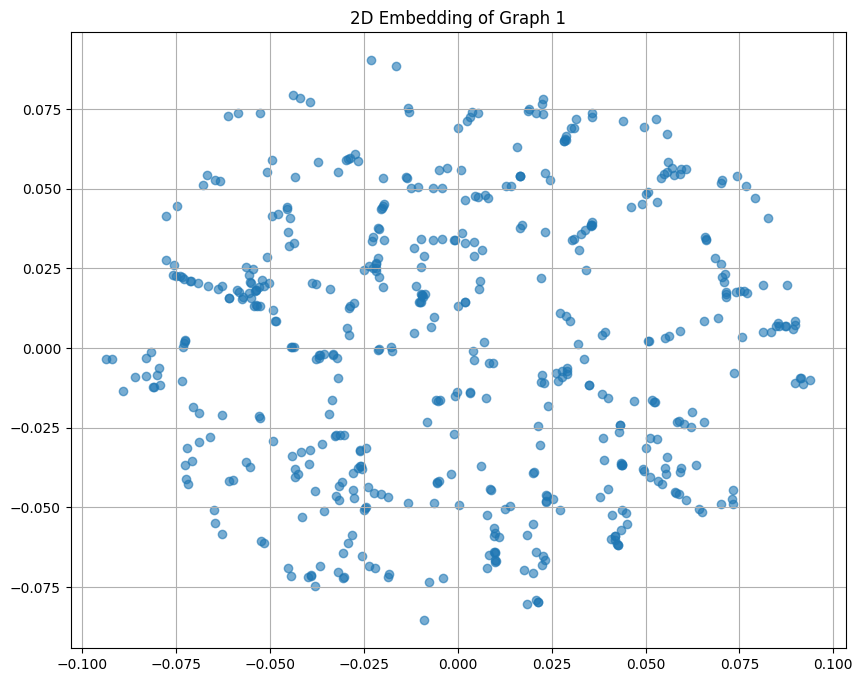

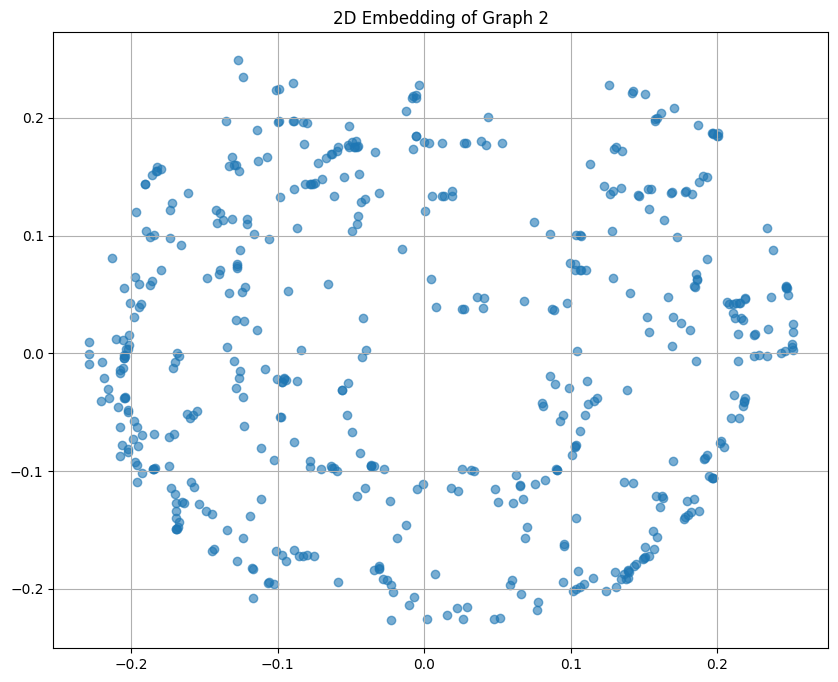

In [5]:
# Function for 2D embedding and plotting
def create_2d_embedding_and_plot(eigvals, eigvecs, graph):
    ix = np.argsort(eigvals)[::-1][:2]
    embedding_2d = eigvecs[:, ix] * np.sqrt(eigvals[ix])
    
    plt.figure(figsize=(10, 8))
    plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], alpha=0.6)
    plt.title('2D Embedding of {}'.format(graph))
    plt.grid(True)
    plt.show()

# Plot 2D embeddings for both graphs
create_2d_embedding_and_plot(eigvals1, eigvecs1, "Graph 1")
create_2d_embedding_and_plot(eigvals2, eigvecs2, "Graph 2")
